In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.cvtColor(cv2.imread('train/DataTrain1.png'), cv2.COLOR_BGR2GRAY)
cv2.imshow('image', img1)
cv2.waitKey()
cv2.destroyAllWindows()


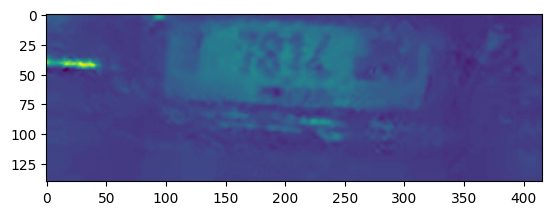

In [29]:
plt.imshow(img1)

In [30]:
kernel = np.array([[-1, -1, -1],
                      [-1, 9, -1],
                      [-1, -1, -1]])
image_sharp = cv2.filter2D(src=img1, ddepth=-1, kernel=kernel)
res = cv2.fastNlMeansDenoising(image_sharp, None, 5, 7, 21)
cv2.imshow('Mat-1 Sharpened', res)
cv2.waitKey()


-1

In [51]:
thresh =31
maxValue = 255

th, im_bin = cv2.threshold(img1, thresh, maxValue, cv2.THRESH_BINARY)
cv2.imshow('image', im_bin)
cv2.waitKey()  
cv2.destroyAllWindows()

In [76]:
thresh = 37
maxValue = 255

th, im_bin = cv2.threshold(image_sharp, thresh, maxValue, cv2.THRESH_BINARY)
cv2.imshow('image', im_bin)
cv2.waitKey()
cv2.destroyAllWindows()


In [89]:
thresh = 45
maxValue = 255

th, im_bin = cv2.threshold(res, thresh, maxValue, cv2.THRESH_BINARY)
cv2.imshow('image', im_bin)
cv2.waitKey()
cv2.destroyAllWindows()


In [83]:
def preprocessImage(imgDir: str):
    kernel = np.array([[-1, -1, -1],
                    [-1, 9, -1],
                    [-1, -1, -1]])
    thresh = 45
    maxValue = 255
    img = cv2.imread(imgDir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
    img = cv2.fastNlMeansDenoising(img, None, 5, 7, 21)
    th, res = cv2.threshold(img, thresh, maxValue, cv2.THRESH_OTSU)
    th, img = cv2.threshold(img, th+8, maxValue, cv2.THRESH_BINARY)
    kernel = np.ones((1, 1), np.uint8)
    # img = cv2.erode(img, kernel, iterations=1)
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    img = cv2.normalize(img, None, 0, 1.0,
                       cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return img
cv2.imshow('image', preprocessImage('train/DataTrain4.png'))
cv2.waitKey()
cv2.destroyAllWindows()

In [81]:
resBin = cv2.fastNlMeansDenoising(im_bin, None, 5, 7, 21)
cv2.imshow('Mat-1 Sharpened', resBin)
cv2.waitKey()


-1